In [498]:
%%html
<style>
div.TOC {    
    background-color: #fcfcfc;
    border-color: #dFdFdF;
    border-left: 5px solid #dFdFdF;
    padding: 0.5em;
    }
div.TOC a {
  color: grey;
  text-decoration: none;
  font-weight: 500;
}
.ToTOC a {
    color:#AAAAAA;
    font-size:18px;
    text-decoration: none;
}
.h-center {
    display: flex;
}
 </style>

In [499]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import random

## Case Study: Its a dogs life - the control of stray dogs<a name="CASE2"></a> <span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Stray dogs are abandoned dogs and their offspring living in urban environments. In [Amuaku et al (2010)](https://www.tandfonline.com/doi/abs/10.1080/08898481003689452), the authors considered how the theory of a single population could contribute to the design of practical programs for the control of stray dogs.

Stray dogs can cause a number of problems and in many countries around the world have become a major public health hazard. Stray dogs typically group into packs and breed, with shelters being unable to cope with the numbers roaming the streets.

Typically, euthanasia is the preferred strategy targeted at strays and although it has an impact on growth rates total eradication is unlikely due to new animals entering the population through abandonment. Here, we will attempt to make a mathematical model to study the effectiveness of euthanasia as a control mechanism.

We start by making some general assumptions about a population of dogs. Let N(t) be the density of the population, that is the number of animals per $km^2$. We assume logistic growth, so 

$$
\frac{dN}{dt} = rN\left(1-\frac{N}{K}\right)
$$

Where $N = N(t)$ is a function of time, $r$ is the intrinsic growth rate and $K$ is the carrying capacity.  The parameter $r$ can be expressed crudely as the difference between the birth rate $a$ and the death rate $b$, so $r = a-b$.

To incorporate euthanasia, we assume that in each time step a constant proportion $\epsilon$ of stray dogs is euthanized in each $km^2$, that is a rate of $\epsilon N(t)$ per $km^2$. The result is a differential equation 

$$
\frac{dN}{dt} = rN\left(1-\frac{N}{K}\right) - \epsilon N
$$

### Analytic Problem 1: (1 Point)
Solve the differential equation above subject to the initial condition that $N(0) = N_0$. You must show your work. 


The given equation can be re-written as,
$$
                                    \frac{dN}{dt} = -\frac{Nr}{k}\left[N-K\left(1-\frac{\epsilon}{r}\right)\right]
$$

Let, $x = -\frac{r}{K}$ and $y = K\left(1-\frac{\epsilon}{r}\right)$

The given equation will be transformed to,
$$
                                    \frac{dN}{dt} = xN(N-y)
$$

#### Case - i ($y \ne 0 \,\, or \,\, \epsilon \ne r$):

Simplifying the above expression using partial fractions,
$$
                                    \left[\frac{1}{N-y} - \frac{1}{N}\right]\,dN = xy\,dt\\
$$
Integration both sides,
$$
                                    \int{\left[\frac{1}{N-y} - \frac{1}{N}\right]\,dN} = \int{xy\,dt}\\
                                    ln\left|\frac{N-y}{N}\right| = xyt + c_1\\
                                    \left|1-\frac{y}{N}\right| = Ae^{xyt}
$$

where $A = e^{c_1}$, a positive real number for some arbitrary constant $c_1$.

<br>
Because of the modulus sign in the above equation, we get the following two solutions.
<br>
<table border="0" width="90%" style="margin: auto;">
 <tr>
    <td style="text-align: center;"><strong>Solution 1</strong></td>
    <td style="text-align: center;"><strong>Solution 2</strong></td>
 </tr>
 <tr>
    <td>
$$
1 - \frac{y}{N} = Ae^{xyt}\\
\frac{y}{N} = (1 - Ae^{xyt})\\
N(t) = \frac{y}{1 - Ae^{xyt}}
$$
<p style="text-align: left;">
    Substituting $N(0) = N_0$, we get,
$$
N_0 = \frac{y}{1-A}\\
A = \frac{N_0-y}{N_0}
$$
Since $A > 0$, this solution is valid when $y < N_0$. Substituting this, we get,
$$
N(t) = \frac{N_0y}{N_0-(N_0-y)e^{xyt}}
$$
    </td>
    <td>
$$
\frac{y}{N}-1 = Ae^{xyt}\\
\frac{y}{N} = 1+Ae^{xyt}\\
N(t) = \frac{y}{1+Ae^{xyt}}
$$
<p style="text-align: left;">
Substituting $N(0) = N_0$, we get,
$$
N_0 = \frac{y}{1+A}\\
A = \frac{y-N_0}{N_0}
$$
Since $A > 0$, this solution is valid when $y > N_0$. Substituting this, we get,
$$
N(t) = \frac{N_0y}{N_0+(N_0-y)e^{xyt}}\\
$$
    </td>
 </tr>
</table>
<br>
Combining, solution 1 and solution 2 for both $y < N_0$ and $y > N_0$, we get a single equation of the following form,

$$
                                    N(t) = \frac{N_0y}{N_0-(N_0-y)e^{xyt}}
$$
where $x = -\frac{r}{K}$ and $y = K\left(1-\frac{\epsilon}{r}\right)$

#### Case - ii ($y = 0 \,\, or \,\, \epsilon = r$):

$$
                                \frac{dN}{dt} = xN^2\\
                                \int{\frac{1}{N^2} dN} = \int{x dt}\\
                                \frac{1}{N} = -xt + c_2
$$

Substituting, $N(0) = N_0$ in the above equation, we get, $c_2 = \frac{1}{N_0}$.<br>
Therefore,
$$
                                \frac{1}{N} = -xt + \frac{1}{N_0}\\
                                N(t) = \frac{N_0}{1-N_0xt}
$$
where $x = -\frac{r}{K}$

***

### Problem 2: (2 Point)
To generate results we require parameter estimates for the literature that are relevant to stray dogs. The carrying capacity was taken to be $250$, close to the average estimate taken in Baltimore in 1970-1971 (Beck, 2002). Further, according to Amaku et al appropriate birth and death rates are $a=0.34$ and $b=0.12$.

Solve the logistic equation with the parameters given for a **reasonable** initial populations $N(0)=N_0$ and $\epsilon$ in three ranges: $\epsilon > a$, $r <\epsilon <a$ and $\epsilon < r$. You may organize this information in any way you want, but be sure it is clearly labeled. 

In [500]:
def euth(t, y, params):
    r = params[0]
    K = params[1]
    eps = params[2]
    dydt = -y * r / K * (y - K * (1 - eps / r))
    return dydt

def fun(slope, domain, t, y):
    z = slope * (domain - t) + y
    return z

def slope_plot(model, t, y1, y2, params, plt):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    for j in t:
        for k in y1:
            slope = model(j, k, params)
            domain = np.linspace(j - 0.05, j + 0.05, 2)
            axes[0].plot(domain, fun(slope, domain, j, k), solid_capstyle = 'projecting', solid_joinstyle = 'bevel')

    for j in t:
        for k in y2:
            slope = model(j, k, params)
            domain = np.linspace(j - 0.05, j + 0.05, 2)
            axes[1].plot(domain, fun(slope, domain, j, k), solid_capstyle = 'projecting', solid_joinstyle = 'bevel')

    axes[0].grid(True)
    axes[1].grid(True)
    fig.tight_layout()

def get_plot(model, eps):
    a, b, K = 0.34, 0.12, 250
    r = a - b
    x = -(r / K)
    y = K * (1 - eps / r)

    t = np.linspace(-8, 8, 20)
    y1 = np.linspace(-10, 10, 20)
    y2 = np.linspace((y - 5), (y + 5), 20)

    params = [r, K, eps]
#     print("x = " + str(x) + " y = " + str(y))
    slope_plot(model, t, y1, y2, params, plt)

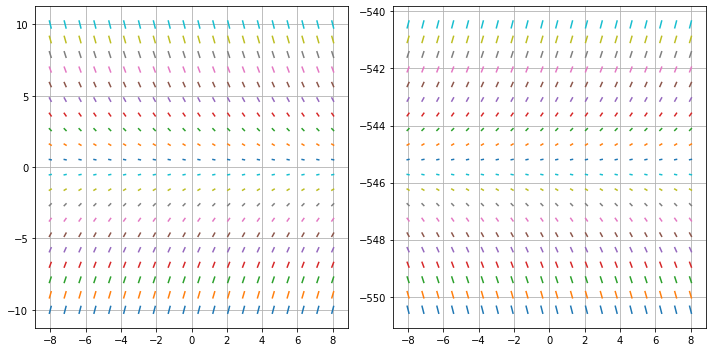

In [501]:
# eps > a

get_plot(euth, 0.7)

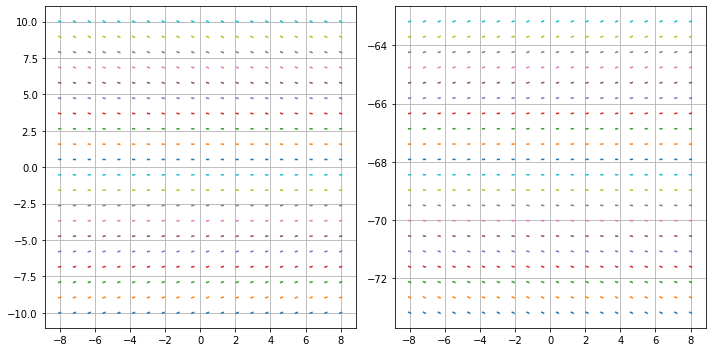

In [502]:
# r < eps < a

get_plot(euth, 0.28)

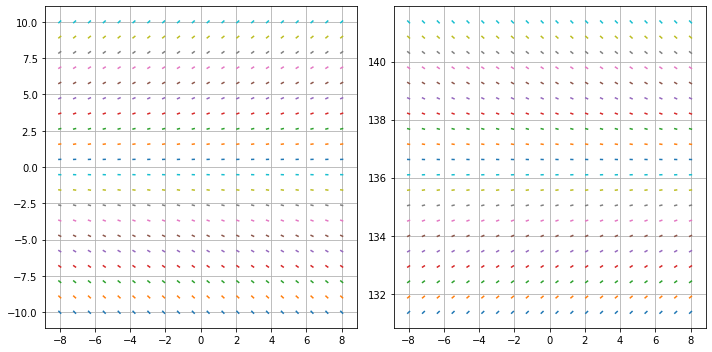

In [503]:
# eps < r

get_plot(euth, 0.1)

2.a) What is a reasonable estimate for $N(0)$ given the information in the case study? What does it mean for $\epsilon >a$, $r<\epsilon<a$ and $\epsilon<r$?

After applying Euthanasia model,
$$
                                    N(t) = \frac{N_0y}{N_0-(N_0-y)e^{xyt}}
$$
where $x = -\frac{r}{K}$ and $y = K\left(1-\frac{\epsilon}{r}\right)$

$$
                                            \frac{dN}{dt} = xN(N-y)
$$

The equilibrium solutions are,
$$
                                        N_1 = 0 \quad and \quad N_2 = y
$$


Since, the carrying capacity itself is $K = 250 \,\, animals \,\, per \,\, Km^2$,

Given $a = 0.34 \,\, and \,\, b = 0.12 \implies r = 0.22$.

##### Case 1 ($\epsilon > a$):
Let $\epsilon = 0.7$. Therefore, $y = K\left(1 - \frac{\epsilon}{r}\right) = 250\left(1 - \frac{0.7}{0.22}\right) \approx -545 $

Since $y$ is negative, we can have $0 < N_0 < K$.

##### Case 2 ($r < \epsilon < a$):
Let $\epsilon = 0.28$. Therefore, $y = K\left(1 - \frac{\epsilon}{r}\right) = 250\left(1 - \frac{0.28}{0.22}\right) \approx -68 $

Since $y$ is negative, we can have $0 < N_0 < K$.

##### Case 3 ($0 < \epsilon < r$):
Let $\epsilon = 0.1$. Therefore, $y = K\left(1 - \frac{\epsilon}{r}\right) = 250\left(1 - \frac{0.1}{0.22}\right) \approx 136$

Since $y$ is positive, we can have $0 < N_0 < y$. If $y < N_0 < K$, the population will still **decrease** and becomes steady at $y$ which is definitely a possible case but **impractical** to assume as euthanasian constant is less here.


From above 3 cases, we can infer that a reasonable assumption for $N_0$ would be satisfying the following conditions:

1. $N_0 > 0$
2. $N_0 < K$
3. $N_0$ is close to $0$

Let $N_0 = 10 \, percent \, of \, K = 25$.



In [504]:
def euth_model(y, t, a, b, k, e):
    r = (a - b)
    dydt = r * y * (1 - y / k) - e * y
    return dydt

In [505]:
def euth_graph(y0, a=0.34, b=0.12, k=250, index=0):
    r = a - b
    t = np.linspace(0, 100, 1000)
    e = [[round(random.uniform(a, 1), 2), round(random.uniform(r, a), 2),
          round(random.uniform(0, r), 2)], [0.1, 0.5]]
    for i, eps in enumerate(e[index]):
#         x = -1 * r / k
#         y = k * (1 - eps / r)
        y_sol = odeint(euth_model, y0, t, args=(a, b, k, eps))
        plt.plot(t, y_sol, label = "y0 = " + str(y0) + ", eps = " + str(eps))
    plt.legend()

In [506]:
a = 0.34
b = 0.12
k = 250

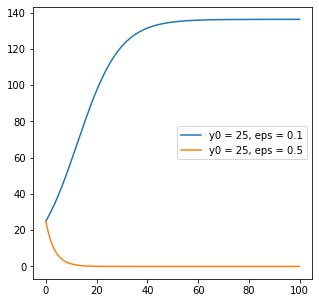

In [507]:
euth_graph(25, a, b, k, 1)

2.b) Numerially solve for the solution to the logistic equation for three values of epsilon: one for $1>\epsilon >a$, $r<\epsilon<a$ and $0<\epsilon<r$. Use a reasonable value for $N_0$ in line with part a.

In [508]:
a = 0.34
b = 0.12
k = 250

In [509]:
t = np.linspace(0, 100, 1000)
# eps = 0.7 or 1 > eps > 0.34
print(round(euth_model(25, t, 0.34, 0.12, 250, 0.7), 2))
# eps = 0.28 or 0.22 < eps < 0.34
print(round(euth_model(25, t, 0.34, 0.12, 250, 0.28), 2))
# eps = 0.1 or 0 < eps < 0.22
print(round(euth_model(25, t, 0.34, 0.12, 250, 0.1), 2))

-12.55
-2.05
2.45


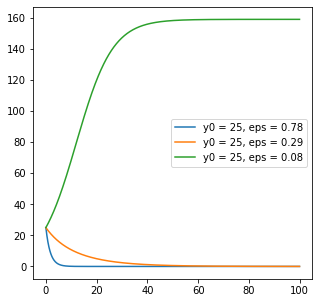

In [510]:
euth_graph(25, a, b, k, 0)

#### Inferences from above plots:

##### Case (i) ($1 > \epsilon > a$):
The blue curve in the above plot. It shows that the population can be controlled in approximately $6 years$ (for $\epsilon = 0.78$), least of all the casses.

##### Case (ii) ($r < \epsilon < a$):
The orange curve in the above plot. It shows that the population can be controlled in approximately $43 years$ (for $\epsilon = 0.29$), a little more time, but eventually possible.

##### Case (iii) ($0 < \epsilon < r$):
The green curve in the above plot. It shows that the population can be eventually stabilized to a positive value but cannot be made to zero.

Hence, this model has best chance of success if the proportion of euthanised animals $\epsilon$ is above the intrinsic growth rate $r$. The population can be controlled with lower proportions.

***

### Analytic Problem 3: (2 Point)

Fine the equilibrium solutions for our model and determine their stability in terms of the parameters $a$, $b$, $K$ and $\epsilon$. What must the value of $\epsilon$ be (in terms of $a$, $b$ and $K$) for the stray population to eventually go to 0?

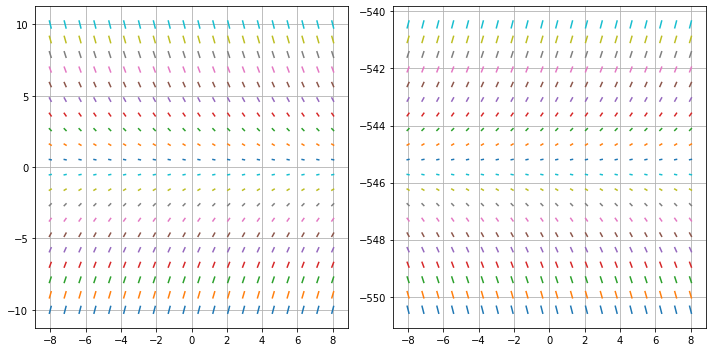

In [511]:
# eps > a

get_plot(euth, 0.7)

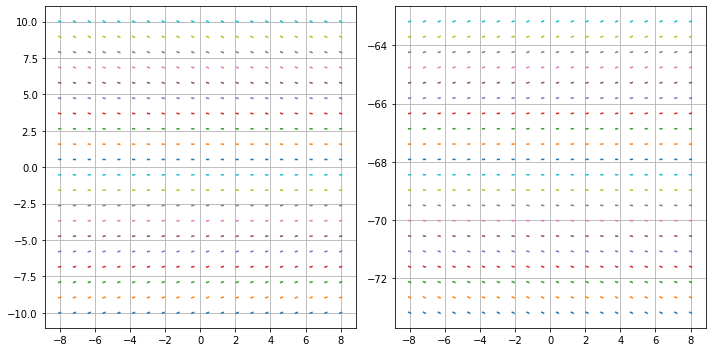

In [512]:
# r < eps < a

get_plot(euth, 0.28)

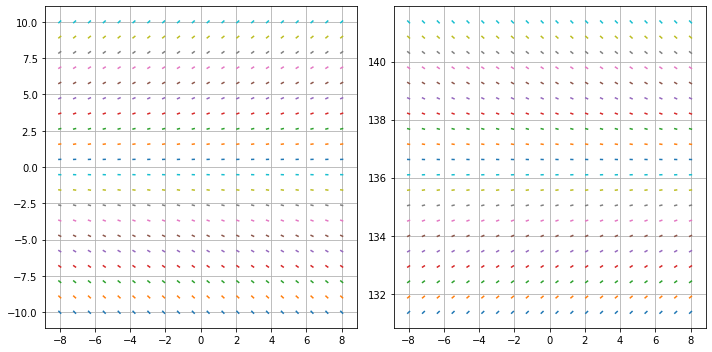

In [513]:
# eps < r

get_plot(euth, 0.1)

Let, $r = a - b$, be the intrinsic growth rate.



After applying Euthanasia model,
$$
                                    N(t) = \frac{N_0y}{N_0-(N_0-y)e^{xyt}}
$$
where $x = -\frac{r}{K}$ and $y = K\left(1-\frac{\epsilon}{r}\right)$

$$
                                            \frac{dN}{dt} = xN(N-y)
$$

Hence, the equilibrium solutions are,
$$
                                        N_1 = 0 \quad and \quad N_2 = y = K\left(1-\frac{\epsilon}{r}\right)
$$

The double derivative,

$$
\begin{align}
                                       \frac{d^2N}{dt^2} &= \frac{d}{dt}(xN(N-y))\\
                                                         &= x\left(N\frac{d}{dt}(N-y)+(N-y)\frac{dN}{dt}\right)\\
                                                         &= x(2N-y)\frac{dN}{dt}\\
                                                         &= x(2N-y)(xN(N-y))\\
                                                         &= x^2N(N-y)(2N-y)\\
\end{align}
$$

It can be seen that $\frac{d^2N}{dt^2} = 0$ at both equilibrium solutions. Hence, double derivative test cannot yield any results about stability.

However, slope plots will give an idea about equilibrium points. From above 3 slope plots (for different values of $\epsilon$), following summary can be derived.


<table border="0" style="background-color: white;">
 <tr>
    <td>$\epsilon = 0.7 \,\, or \,\, 1 > \epsilon > a$</td>
    <td>
        <table border="0" style="background-color: white;">
            <tr><td>$N = 0$</td></tr>
            <tr><td>$N = y = K\left(1-\frac{\epsilon}{r}\right)$</td></tr>
        </table>
     </td>
    <td>
        <table border="0" style="background-color: white;">
            <tr><td>Stable equilibrium</td></tr>
            <tr><td>Unstable equilibrium</td></tr>
        </table>
     </td>
 </tr>
 <tr>
    <td>$\epsilon = 0.28 \,\, or \,\, r < \epsilon < a$</td>
    <td>
        <table border="0" style="background-color: white;">
            <tr><td>$N = 0$</td></tr>
            <tr><td>$N = y = K\left(1-\frac{\epsilon}{r}\right)$</td></tr>
        </table>
     </td>
    <td>
        <table border="0" style="background-color: white;">
            <tr><td>Stable equilibrium</td></tr>
            <tr><td>Unstable equilibrium</td></tr>
        </table>
     </td>
 </tr>
 <tr>
    <td>$\epsilon = 0.1 \,\, or \,\, 0 < \epsilon < r$</td>
    <td>
        <table border="0" style="background-color: white;">
            <tr><td>$N = 0$</td></tr>
            <tr><td>$N = y = K\left(1-\frac{\epsilon}{r}\right)$</td></tr>
        </table>
     </td>
    <td>
        <table border="0" style="background-color: white;">
            <tr><td>Unstable equilibrium</td></tr>
            <tr><td>Stable equilibrium</td></tr>
        </table>
     </td>
 </tr>
</table>



From slope plots it is quite evident that for all $\epsilon > r \,\, or \,\, \epsilon > a - b$ the stray population would eventually go to zero.


For $\epsilon = a - b$ also the population would eventually go to zero, because in this case, the differential equation would become $\frac{dN}{dt} = -\frac{rN^2}{K}$.

This is always negative and hence the slope of the curve is decreasing forever and solving this we get the analytic equation as mentioned in Problem 1 and in this case, $N(\infty) = 0$.


***

### Problem 4: (1 Point)

Rehousing is not always an option, but in some cases shelters exist which can help mitigate the stray dog population. If the shelter system can rehouse $h$ dogs per year, the model becomes

$$
\frac{dN}{dt} = rN\left(1-\frac{N}{K}\right) - h
$$

Assume that $a$ and $b$ and $K$ are as above and $h=10$. Solve the equation numerically for $N_0 = 10$ and $N_0 = 100$ and plot the result.

In [514]:
def rehousing_model(y, t, params):
    a, b, k, h = params[0], params[1], params[2], params[3]
    r = (a - b)
    dydt = r * y * (1 - y / k) - h
    return dydt

In [515]:
def rehousing_graph(t, y0, a=0.34, b=0.12, k=250, h=10):
    params = [0.34, 0.12, 250, 10]
    y_sol = odeint(rehousing_model, y0, t, args=(params,))
    plt.plot(t, y_sol, label = "y0 = " + str(y0) + ", h = " + str(h))
    plt.legend()

-7.89


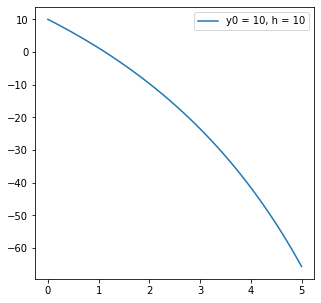

In [516]:
t = np.linspace(0, 5, 100)
params = [0.34, 0.12, 250, 10]
print(round(rehousing_model(10, t, params), 2))
rehousing_graph(t, 10)

3.2


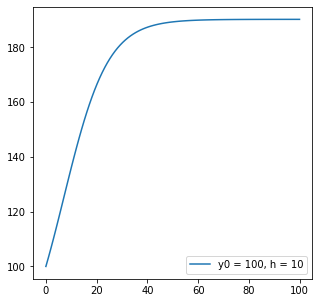

In [517]:
t = np.linspace(0, 100, 100)
params = [0.34, 0.12, 250, 10]
print(round(rehousing_model(100, t, params), 2))
rehousing_graph(t, 100)

---

### Analytic Problem 5: (1 Point)

For $a$, $b$, $K$ and $h$ as in Problem 4, for which initial populations $N_0$ does the number of stray dogs remain stable? For which $N_0$ does the population eventually go to 0? Provide an interval for each case.

In [518]:
def fun(slope, domain, t, y):
    z = slope * (domain - t) + y
    return z

def rehouse_slope_plot(model, params):
    t = params[0]
    y1 = params[1]
    y2 = params[1]
    plt = params[-1]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    for j in t:
        for k in y1:
            slope = model(k, j, params[3:])
            domain = np.linspace(j - 0.05, j + 0.05, 2)
            axes[0].plot(domain, fun(slope, domain, j, k), solid_capstyle = 'projecting', solid_joinstyle = 'bevel')

    for j in t:
        for k in y2:
            slope = model(k, j, params[3:])
            domain = np.linspace(j - 0.05, j + 0.05, 2)
            axes[1].plot(domain, fun(slope, domain, j, k), solid_capstyle = 'projecting', solid_joinstyle = 'bevel')

    axes[0].grid(True)
    axes[1].grid(True)
    fig.tight_layout()

def get_plot(model, params):
#     print("x = " + str(x) + " y = " + str(y))
    rehouse_slope_plot(model, params)

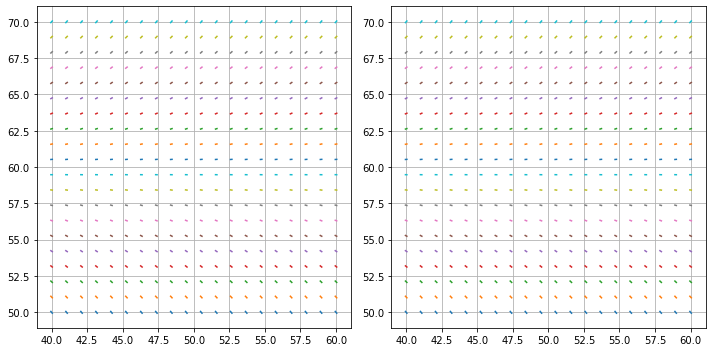

In [519]:
t = np.linspace(40, 60, 20)
y1 = np.linspace(180, 200, 20)
y1 = np.linspace(50, 70, 20)
params = [t, y1, y2, 0.34, 0.12, 250, 10, plt]
get_plot(rehousing_model, params)

The second derivative is equal to zero. Hence, this test will not yield consistent results for stability.

Hence, we look at slope plots.

It can be clearly seen that there are two equilibrium points for the models with following params,

$$
    a = 0.34,\, b = 0.12,\, K = 250,\, h = 10
$$

They can be obtained by solving the following equation:

$$
                                    \frac{dN}{dt} = 0\\
                                    rN\left(1-\frac{N}{K}\right) - h = 0\\
                                    -\frac{r}{K}\left(N^2 - KN + \frac{Kh}{r}\right) = 0\\
                                    N^2 - KN + \frac{Kh}{r} = 0
$$

The roots of this equation are,

<table border="0">
    <tr>
        <td>$N_1 = \frac{K - \sqrt{K^2-4\frac{Kh}{r}}}{2}$</td>
    </tr>
    <tr>
        <td>$N_2 = \frac{K + \sqrt{K^2-4\frac{Kh}{r}}}{2}$</td>
    </tr>
</table>

We get, $N_1 \approx 59.72  \,\, and \,\, N_2 \approx 190.28$ as the equilibrium points.

From the slope plots, around the above equilibrium points, we can clearly see that $N_2$ is stable solution and $N_1$ is unstable solution.

Also, for any intial population $N_0$ greater that or equal to $N_1$, the population stabilizes and for $N_0$ less than $N_1$ the population collapses.

Hence,

1. stable initial population interval is, $N_0 >= N_1$.
2. collapsing initial population interval is, $N_0 < N_1$.


---

### Analytic Problem 6: (1 Point)

Assume that $N_0$ = 30. What is the minimum value of $h$ in the re-homing model such that the population eventually falls to 0?

As seen above, for population to collapse, $N_0 < N_1$,

So, least $N_1$ for which the population remains stable should be $N_1 > 30$.

We know that,
$$
                            N_1 = \frac{K - \sqrt{K^2-4\frac{Kh}{r}}}{2}
$$

Hence,
$$
                            \frac{250 - \sqrt{250^2 - 4\frac{250 h}{0.22}}}{2} > 30
$$

Therefore,
$$
\begin{align}
                               h_{min} &> \frac{726}{125}\\
                                       &=  5.808\\
                                     &\approx \boxed{6}
\end{align}
$$

---

### Analytic Problem 7: (1 Point)

Consider the re-homing model and the euthanasia model. Fix $a$, $b$ and $K$ as above. 

7.a) Does $N_0$, the initial population, effect the long term behavior of either model? Justify your answer.

7.b) In the euthanasia model, is there a value of $\epsilon$ that guarantees the population will eventually fall to 0 regardless of $N_0$? If not, why not, and if so what is the value?

7.c) In the re-homing model, is there a value of $h$ that guarantees the population will eventually fall to 0 regardless of $N_0$? If not, why not, and if so what is the value?

a)

In the euthanasian model, there is no effect of initial population. The collapse or stability just depends on the value of $\epsilon$. It can be clearly seen from the slope plots that,

1. For $\epsilon >= r$ the population eventually collapses to zero for whatever $N_0$.
2. For $\epsilon < r$ the population eventually stabilizes to $y = K(1 - \frac{\epsilon}{r})$ for whatever $N_0$.



However, rehousing model is different. It depends on the lowest equilibrium solution (or unstable equilibrium solution).

Let us define the collapsing rehousing constant as $h_c$.

For $h_c$, we must have,

$$
                                    K^2 - 4\frac{Kh_c}{r} = 0\\
                                    h_c = \frac{rK}{4}
$$


1. For a sufficiently high rehousing constant $h >= h_c$, the population always collapses.
2. For lower rehousing constants $h < h_c$, the population collapses to zero only if $N_0 < N_1$, where $N_1 = \frac{K - \sqrt{K^2-4\frac{Kh}{r}}}{2}$.

<br>
<br>
<br>

b)

Yes. In the euthanasia model, there is a value for $\epsilon$ for which the population eventually collapses to zero regardless of initial population $N_0$. From the slope plots above, it is clear that,

* For $\epsilon >= r$ the population eventually collapses to zero for whatever $N_0$.

<br>
<br>
<br>

c)

Yes. In the rehousing model, there is a value for $h$ for which the population eventually collapses to zero regardless of initial population $N_0$.

Let us define the collapsing rehousing constant as $h_c$.

For $h_c$, we must have,

$$
                                    K^2 - 4\frac{Kh_c}{r} = 0\\
                                    h_c = \frac{rK}{4}
$$


1. For a sufficiently high rehousing constant $h >= h_c$, the population always collapses.
2. For lower rehousing constants $h < h_c$, also the population collapses to zero if $N_0 < N_1$, where $N_1 = \frac{K - \sqrt{K^2-4\frac{Kh}{r}}}{2}$.


***

## Bonus:

Consider the combined model

$$
\frac{dN}{dt} = rN\left(1-\frac{N}{K}\right) - h - \epsilon N
$$

With $a$, $b$ and $K$ as above. Assume it is found that there are $N_0 = 30$ strays per $km^2$. 

Assume that the total cost of the combined solution is $C(\epsilon, h) = \alpha(\epsilon^2 + h)$. What is the most cost effective combination of euthanaisa and rehoming that eventaully diminishes the population to 0?